In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Importing the Data
I have imported the data using my drive link.
I have also provided the csv files in the repository, you can download those files and use them.

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/ishantjuyal/Fake-News/master/Dataset/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ishantjuyal/Fake-News/master/Dataset/test.csv')

In [3]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


Now, we will fill the null values with spaces so that our text data could be consistent

In [4]:
print(train.isnull().sum())
print("***")
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
***
id          0
title     122
author    503
text        7
dtype: int64


In [5]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In the given data, all the features like title, author and text are important. SO, we can combine all the text features to make one feature. Let's call it *total*

In [0]:
train = train.fillna(' ')
test = test.fillna(' ')

test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [7]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [8]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


# Creating Word Clouds

First, we would form two strings. One including all the words from news which is real, and another false string consisting of all the words from fake news.

In [0]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 

'''
STOPWORDS library provides us with all those words which are really common 
in the English language and do not contribute in deciding whether the news
is real or fake
'''

# iterate through the csv file 
for val in train[train['label']==1].total:
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

Now we will plot the wordclouds for the most frequent words in real news and fake news separately. 

This is the wordclouds for words in real news

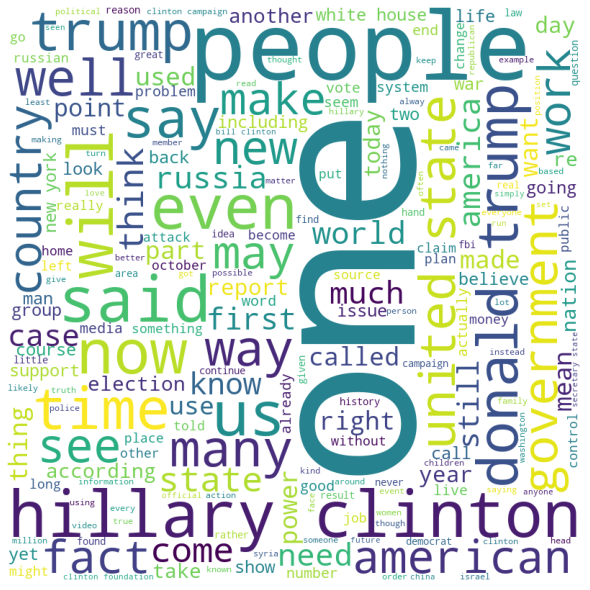

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(real_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Given below is the wordcloud for most frequent words in fake news articles.

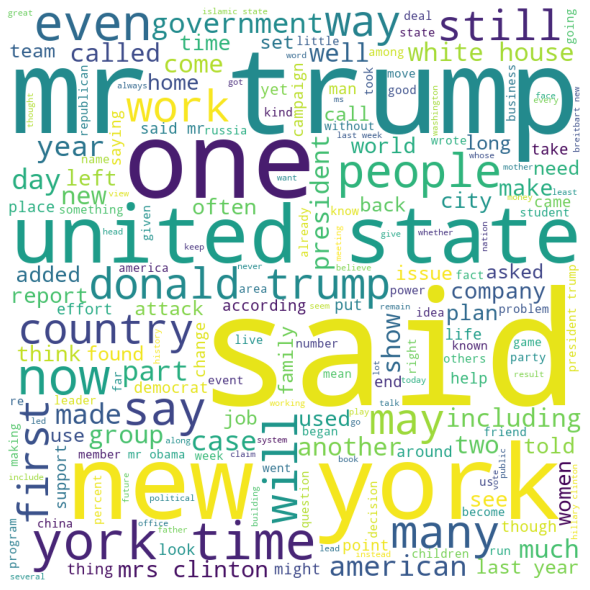

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(fake_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Preprocessing/ Cleaning of Data

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

In [13]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

for index, row in train.iterrows():
    filter_sentence = ''
    sentence = row['total']
    
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization
    words = nltk.word_tokenize(sentence)

    # Stopwords removal
    words = [w for w in words if not w in stop_words]

    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()

    train.loc[index, 'total'] = filter_sentence

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
for index, row in test.iterrows():
    filter_sentence = ''
    sentence = row['total']
    
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization
    words = nltk.word_tokenize(sentence)

    # Stopwords removal
    words = [w for w in words if not w in stop_words]

    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()

    test.loc[index, 'total'] = filter_sentence

Now, as we have transformed the text data, we can clean the data and separate them into X and Y

In [0]:
train = train[['total', 'label']]

In [16]:
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [0]:
X_train = train['total']
Y_train = train['label']

## Vectorizer

By using CountVectorizer function we can convert text document to matrix of word count.



In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [21]:
tf_idf_matrix

<20800x210578 sparse matrix of type '<class 'numpy.float64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

Now, as we have prepared the data, we can split the data into training and test set to check which model will be best suited for classification

In [0]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 0.98
Accuracy of Lasso classifier on test set: 0.96


array([[2448,  116],
       [  84, 2552]])

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.84


array([[2557,    7],
       [ 803, 1833]])

# Decision Tree Classifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.97


array([[2474,   90],
       [  62, 2574]])

We can easily see that out of the three models, Decision Tree Classifier performs best.
Now, we will make a pipeline so that we can easily perform the classification task for any new data

# Pipeline

In [0]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [27]:
X_train.head()

0     house dem aide we didnt even see comeys lette...
1     flynn hillary clinton big woman campus breitb...
2     why truth might get you fired consortiumnewsc...
3     15 civilians killed in single us airstrike ha...
4     iranian woman jailed fictional unpublished st...
Name: total, dtype: object

In [0]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import tree
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', tree.DecisionTreeClassifier()),
])

In [31]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

We can use this pipeline to predict labels for our test data which the training model has never seen before.

In [36]:
test.head()

0     specter trump loosens tongues not purse strin...
1     russian warship ready strike terrorist near a...
2     nodapl native american leaders vow stay all w...
3     tim tebow will attempt another comeback this ...
4     keiser report meme wars e995 truth broadcast ...
Name: total, dtype: object

In [0]:
pred_label = pipeline.predict(test)

In [39]:
pred_label.shape

(5200,)